# BCB546X-Python Assignment
## Authors: Dr. X and Tanner M. Cook

### May 5th, 2021

This document will contain the code provided by Dr. X with additions and documentation from Tanner M. Cook

In [199]:
# Import dependencies needed for analysis
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

In [200]:
# 1
def get_sequences_from_file(fasta_fn):  # This defines the function name as "get_sequences_from_file" fasta_fn=parameters
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):  # Will take a file name and format name(fasta), and return a SeqRecod iterator (Ability to call individual elements)
        description = record.description.split()   # Will split the record description
        species_name = description[1] + " " + description[2] # Will take the split into species name
        sequence_data_dict[species_name] = record.seq #Will take the nucleotide information by species
    return(sequence_data_dict) # Returns an output containing the species and nucleotide information. From the fasta file, the ID and descriptions are not called.

#sources= (1)https://www.programiz.com/python-programming/function; (2)https://eeob-biodata.github.io/BCB546X-python/02-datatypes/
    # (3) https://biopython.org/wiki/SeqIO

In [201]:
get_sequences_from_file("bears_cytb.fasta")

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA'),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA'),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA'),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA'),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA'),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA'),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA'),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA'),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...AGA')}

In [202]:
#2
###### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names
from Bio.SeqRecord import SeqRecord

def CDS_translation2(FASTA):
    with open("AAseq.fasta", 'w') as aa_fa:
        for dna_record in SeqIO.parse(FASTA, 'fasta'):   #Select dna for each species in the parsed file
            dna_seqs = [dna_record.seq]                                #Set as new variable and use DNA seq
            aa_seqs = (s[i:].translate(2,to_stop=True) for i in range(3) for s in dna_seqs)  #Translate the DNA to a stop codon using the vertebrate mitochrondirial table (denoted by 2)
            max_aa = max(aa_seqs, key=len)                                                 #The longest iteration is saved for each nucleotide string
            aa_record = SeqRecord(max_aa, id=dna_record.id, description="translated sequence")# Save the longest string as a dna record in aa_record
            SeqIO.write(aa_record, aa_fa, 'fasta') #Data is written to AAseq_file
        
        
        
        #Source: https://stackoverflow.com/questions/49073217/how-to-use-biopython-to-translate-a-series-of-dna-sequences-in-a-fasta-file-and
        #(MERV)

In [203]:
CDS_translation2("bears_cytb.fasta") #Data is saved to a file called "AAseq.fasta" Here, the nucleotide information will be stored as well as the record.id

C:\Users\Tcook\Anaconda3\lib\site-packages\Bio\Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [204]:
## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function. 

def CDS_translation3(FASTA):
    handle = open(FASTA, "r") 
    seq_list = list(SeqIO.parse(handle, "fasta")) # The data will be parsed out as a list for a raw string for each nucleotide string
    handle.close()
    A=(seq_list[0].seq)
    B=(seq_list[1].seq)
    C=(seq_list[2].seq)
    D=(seq_list[3].seq)
    E=(seq_list[4].seq)                  #Each indexed part of seq_list will represent a string of nucleotides for each bear species
    F=(seq_list[5].seq)
    G=(seq_list[6].seq)
    H=(seq_list[7].seq)
    I=(seq_list[8].seq)
    liste=[A,B,C,D,E,F,G,H,I]
    for i in liste:
           print(i.translate(table=2,to_stop=True))# Each nucleotide sequence for each bear will be translated using Table 2 (indicative of vertebrate mitochondrial codon table), and stop means it goes until the first stop codon
        
        #Source:http://biopython.org/DIST/docs/tutorial/Tutorial.html#sec25 ;https://eeob-biodata.github.io/BCB546X-python/06-biopython/

In [205]:
CDS_translation3("bears_cytb.fasta")

MTNIRKTHPLAKIINNSFIDLPTPSNISAWWNFGSLLGVCLILQILTGLFLAMHYTSDTTTAFSSITHICRDVHYGWVIRYMHANGASMFFICLFMHVGRGLYYGSYLFSETWNIGIILLLTVMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTDLVEWIWGGFSVDKATLTRFFAFHFILPFIILALAAVHLLFLHETGSNNPSGIPSDSDKIPFHPYYTIKDILGALLLTLALAALVLFSPDLLGDPDNYTPANPLSTPPHIKPEWYFLFAYAILRFIPNKLGGVLALIFSILILAIISLLHTSKQRGMMFRPLSQCLFWLLVADLLTLTWIGGQPVEHPFIIIGQLASILYFTIPLVLMPIAGIIENNLLKW
MTNIRKTHPLAKIINNSLIDLPTPSNISAWWNFGSLLGVCLILQILTGLFLAMHYTPDTTTAFSSVTHICRDVHYGWVIRYVHANGASIFFICLFMHVGRGLYYGSYLFSETWNIGIILLFTIMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTDLVEWIWGGFSVDKATLTRFFAFHFILPFIILALAAVHLLFLHETGSNNPSGIPSDSDKIPFHPYYTIKDILGALLLALTLATLVLFSPDLLGDPDNYTPANPLSTPPHIKPEWYFLFAYAILRSIPNKLGGVLALIFSILILAIIPLLHTSKQRGMMFRPLSQCLFWLLVADLLTLTWIGGQPVEHPFIIIGQLASILYFTILLVLMPIAGIIENNLLKW
MTNIRKTHPLAKIINNSLIDLPAPSNISAWWNFGSLLGMCLILQILTGLFLAMHYTSDATTAFSSVAHICRDVHYGWIIRYMHANGASMFFICLFMHVGRGLYYGSYLLSETWNIGIILLFTVMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTDLVEWIWGGFSVDKATLTRFFAFHFILPFIILALAAVHLLFLHETGSNNPSGIPSDSDKIPFHPYYTIKDALGALLLILALA

In [206]:
#4
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqIO import FastaIO

def Molecular_weight(FASTA):
    with open(FASTA) as fd:
        for name, sequence in FastaIO.SimpleFastaParser(fd):  
            X = ProteinAnalysis(sequence)
            print(X.molecular_weight())                       #The Amino acid sequence of each species will be selected and molecular weight will be determined
    
    #sources:https://biopython.org/wiki/ProtParam ; https://stackoverflow.com/questions/57274871/how-do-i-calculate-percentage-amino-acid-composition-of-sequences-contained-in-a

In [207]:
Molecular_weight("AAseq.fasta")

42458.79919999999
42414.743499999975
42306.67349999998
42551.98999999998
42427.74389999999
42560.89100000001
42702.184499999996
42384.82659999999
42454.78729999998


In [208]:
#5
from Bio.SeqUtils import GC
def GC_content(Fasta_fn):
    with open(Fasta_fn) as BC:
        for name, sequence in FastaIO.SimpleFastaParser(BC):  # The nucleotide sequence from each bear species will be selected and the GC content will be calculated as a percentage
            X = GC(sequence)
            print(X)
            
#Sources: https://biopython.org/docs/1.75/api/Bio.SeqUtils.html ; https://stackoverflow.com/questions/57274871/how-do-i-calculate-percentage-amino-acid-composition-of-sequences-contained-in-a

In [209]:
GC_content("bears_cytb.fasta")

43.771929824561404
43.771929824561404
45.6140350877193
45.175438596491226
43.94736842105263
44.29824561403509
40.78947368421053
44.3859649122807
44.29824561403509


In [210]:
###MAIN##

In [211]:
#loading of files
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 

bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 
species_list = list(bears_df.species)


In [212]:
## 6 ## 
## Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

Z=("NaN")
bears_df["GC_percentage"]=Z
bears_df["molecular_weight"]=Z
bears_df
#Source: https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

,species,mass,GC_percentage,molecular_weight
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


In [213]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
#for key, value in cytb_seqs.items():
   # aa_seq = CDS_Translation2(FASTA) # whichever function you prefer of #2 or #3
   # Molecular_weight=Molecular_weight(key)
    #GC=GC_Content(FASTA)
#     fill in empty cells in DF that you created above





In [214]:
#aa_seq = CDS_translation("bears_cytb.fasta") # whichever function you prefer of #2 or #3
#MW=Molecular_weight("AAseq.fasta")
#gc=GC_content("bears_cytb.fasta")


#df = pd.DataFrame(list(zip(gc)))
#bears_df["GC_percentage"]=gc
#bears_df["molecular_weight"]=MW
#bears_df

In [215]:

MW=[3207.7007000000003, 3173.6845000000003, 3143.6585000000005, 3143.6585000000005, 3173.6845000000003, 3143.6585000000005, 3277.8335000000006, 3180.6754, 3207.7007000000003]#Outputs from the files above
GC=[43.771929824561404,43.771929824561404,45.6140350877193,45.175438596491226,43.94736842105263,44.29824561403509,40.78947368421053,44.3859649122807,44.29824561403509]

bears_df["GC_percentage"]=GC
bears_df["molecular_weight"]=MW
bears_df

,species,mass,GC_percentage,molecular_weight
0,Ursus spelaeus,550.800,43.771930,3207.7007
1,Ursus arctos,203.500,43.771930,3173.6845
2,Ursus thibetanus,99.714,45.614035,3143.6585
3,Melursus ursinus,100.030,45.175439,3143.6585
4,Ursus americanus,110.560,43.947368,3173.6845
5,Helarctos malayanus,47.020,44.298246,3143.6585
6,Ailuropoda melanoleuca,118.200,40.789474,3277.8335
7,Tremarctos ornatus,140.700,44.385965,3180.6754
8,Ursus maritimus,425.100,44.298246,3207.7007


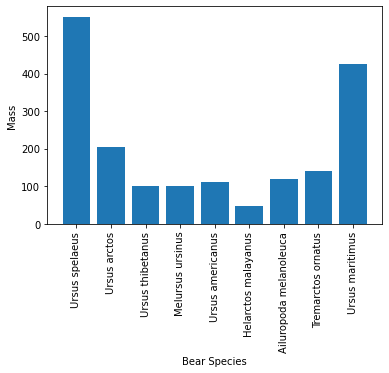

In [216]:
## 8 ##
#Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the largest bear species? 
## *Q2* What else is interesting about this species?
import matplotlib.pyplot as plt
# Categorical data: Country names
species = bears_df["species"]
mass=bears_df["mass"]              #Assigning variables to the columns we want to work with
plt.bar(species, mass)             #Plot variables against each other (x-axis, y-axis)
plt.xticks(rotation = 90) #rotates the labels so they are readable and not clumped up together along the X-axis
plt.xlabel('Bear Species')
plt.ylabel('Mass')
plt.show()

#Source:https://towardsdatascience.com/mastering-the-bar-plot-in-python-4c987b459053 ;https://www.w3schools.com/python/matplotlib_labels.asp ; https://stackabuse.com/rotate-axis-labels-in-matplotlib/

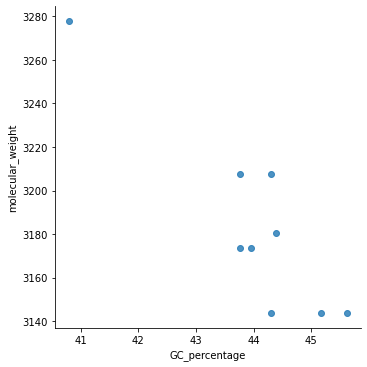

In [217]:
## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).
import seaborn as sns
sns.lmplot(x="GC_percentage", y="molecular_weight", data=bears_df, fit_reg=False) #Makes a scatterplot of GC content vs. molecular weight
#Source:https://eeob-biodata.github.io/BCB546X-python/05-seaborn-viz/

In [218]:
## 10 ##
## Save the new DataFrame to a file called "bears_mass_cytb.csv"

bears_df.to_csv("bears_mass_cytb.csv")

#Source:https://datatofish.com/export-dataframe-to-csv/

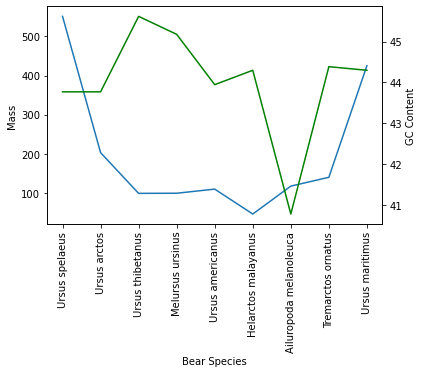

In [219]:
## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)

fig, ax1 = plt.subplots()
species = bears_df["species"]
mass=bears_df["mass"] 
GC=bears_df["GC_percentage"]
plt.xticks(rotation = 90)

ax1.set_ylabel('Mass')
ax1.set_xlabel('Bear Species')
ax1.plot(species,mass)                               #Shows the relationship between GC content and Mass of the bears. Here, there are two different Y-axis values



ax2 = ax1.twinx()
ax2.set_xlabel('Bear Species')
ax2.set_ylabel('GC Content')
ax2.plot(species,GC,color='green')


plt.show()


#Sources:https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html;https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html